# Zoltar-MX
27/11/2020

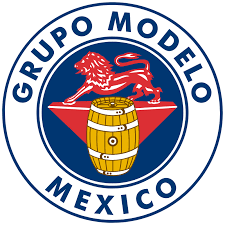

In [1]:
#Import library
from IPython.display import Image
# Load image from local storage
Image(filename = "/Users/antoniomani/Downloads/descarga.png")

We will use Hex colors of Grupo Modelo

# Making distance algorithms

## In this file we will create the three distances mentioned on the Readme.md

In [4]:
# Importing packages
from math import radians
import pandas as pd
from sklearn.metrics import pairwise_distances
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import skew, kurtosis

In [5]:
# Importing data
path = "/Users/antoniomani/Downloads/ubicaciones.csv"
df = pd.read_csv(path)

For the Haversine distance we need radians coordinates, so first we need to make that transformation

In [12]:
df["lat_radians"] = df["lat"].apply(lambda x: radians(x))
df["lon_radians"] = df["lon"].apply(lambda x: radians(x))

Applying the three distances: Harvesine, Euclidean, Manhattan

In [14]:
#haversine distance is on km scale
dist_matrix_haversine = (pairwise_distances(df[["lat_radians", "lon_radians"]], metric='haversine'))*(6371000/1000)
dist_matrix_euclidean = pairwise_distances(df[["lat", "lon"]], metric='euclidean')
dist_matrix_manhattan = pairwise_distances(df[["lat", "lon"]], metric='manhattan')   

Then we need to reshape our data to a one dimension vector, we will use reshape method

In [15]:
# reshape 
dist_vector_h = dist_matrix_haversine.reshape(1,13140625)
dist_vector_e = dist_matrix_euclidean.reshape(1,13140625)
dist_vector_m = dist_matrix_manhattan.reshape(1,13140625)

Then, here is a function created to extract the principal metrics from each vector

In [17]:
# function to compute metrics 
def compute_metrics(x):
    # compute "measures"
    x_mean = np.mean(x)
    x_std = np.std(x) # volatility
    x_skew = skew(x)
    x_kurt = kurtosis(x) # excess kurtosis
    x_median = np.median(x)
    x_min = min(x)
    x_max = max(x)
    x_q1 = np.quantile(x,0.25)
    x_q3 = np.quantile(x,0.75)
      # print metrics
    round_digits = 4
    str1 = 'Metrics of the data: ' + '\n'\
        + 'mean ' + str(np.round(x_mean,round_digits))\
        + ' | median ' + str(np.round(x_median,round_digits))\
        + ' | std dev ' + str(np.round(x_std,round_digits))\
        + ' | skewness ' + str(np.round(x_skew,round_digits))\
        + '\n'\
        + 'min ' + str(np.round(x_min,round_digits))\
        + ' | max ' + str(np.round(x_max,round_digits))\
        + ' | Q1 ' + str(np.round(x_q1,round_digits))\
        + ' | Q3 ' + str(np.round(x_q3,round_digits))\
        + ' | kurtosis ' + str(np.round(x_kurt,round_digits))
    return str1

Then, we will plot the three histograms of each distance, and also show the metrics below the shape

## Haversine

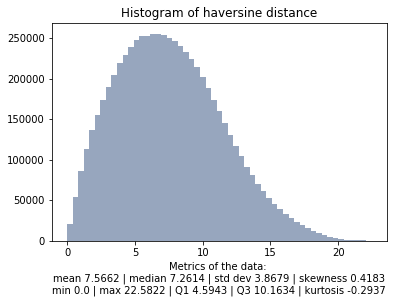

In [19]:
# histograms
plt.figure()
plt.hist(np.random.choice(dist_vector_h[0],6570312,False),bins = 55,color='#97a6be')
plt.title('Histogram of haversine distance')
plt.xlabel(compute_metrics(dist_vector_h[0]))
plt.show()

We need to have in mind that Haversine distance is on km scale, and that's why our values are bigger than the other two distances, we could see that the mean and median are similar, so that is a good indicator. 

## Euclidean

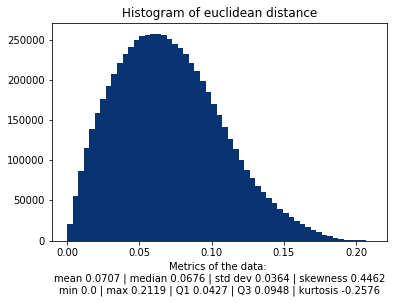

In [20]:
plt.figure()
plt.hist(np.random.choice(dist_vector_e[0],6570312,False),bins = 55,color='#083372')
plt.title('Histogram of euclidean distance')
plt.xlabel(compute_metrics(dist_vector_e[0]))
plt.show()

From this one we could see that the values are below 0.22 because here we didn't do any transformation like in Haversine one. We know that Euclidean distance is a good formula and also the most used. Seeing the shape of the histogram we could see that most of the distances are acumulated around 0.06.

## Manhattan

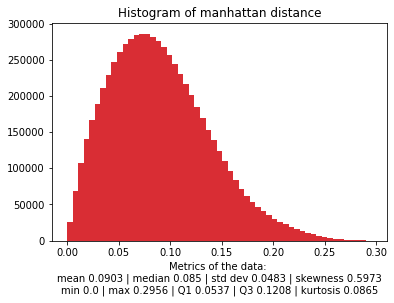

In [21]:
plt.figure()
plt.hist(np.random.choice(dist_vector_m[0],6570312,False),bins = 55,color='#d92d34')
plt.title('Histogram of manhattan distance')
plt.xlabel(compute_metrics(dist_vector_m[0]))
plt.show()

Finally, from this last algorithm we could see that this histogram show that the distribution of distances has a heavy right tail, and most of the values are around 0.085.

### Which one is better? 

The answer to this is as almost everything in statistics, 'depends'. A good point for Haversine is that the values are on Km so maybe it's more realistic to our problem, but also has higher values that the other two, Manhattan one has the higher kurtosis and higher skewness because of the said above about the heavy tails. Euclidean is also is really similar in values (if we divide Harversine by one hundred), some minor changes betweeen the two. But at the end, the three have a really similar distribution, and that is why, we will use the three for further analysis and review.